In [151]:
import numpy as np
import holoviews as hv
import scipy.sparse.linalg as linalg
%matplotlib inline
import matplotlib.pyplot as plt

hv.notebook_extension()

In [348]:
dp = 0.1
dt = 0.0005
p0 = 50
L = 1000
T = 0.05

In [349]:
p = np.linspace(0, L, num = int(L/dp))
psi_m = np.zeros(shape = (int(L/dp), int(T/dt))) + 0j
psi_r = np.zeros(shape = (int(L/dp), int(T/dt))) + 0j

psi_m[:, 0] = np.exp(-(p-p0)**2/2)
#si[:, 0] = np.sin(np.pi*x/L)

#   Normalize wave function
psi_m[:, 0] = psi_m[:,0]/np.linalg.norm(psi_m[:, 0])

In [359]:
def barrier(x):
    if x>500 and x<600:
        return 10000
    else:
        return 0
    
V = np.zeros(int(L/dp))

In [366]:
for i in range(0, int(T/dt)-1):
    psi_r[:, i] = np.fft.ifft(psi_m[:, i] *np.exp(-dt*p**2/2), norm = "ortho")
    psi_r[:, i] = psi_r[:,i]/np.linalg.norm(psi_r[:, i])
    psi_m[:, i+1] = np.fft.fft(psi_r[:, i]*np.exp(-dt*V), norm = "ortho")
    #np.linalg.norm(psi_r[:, i])psi_m[:, i] = psi_m[:,0]/np.linalg.norm(psi_m[:, 0])

b':HoloMap   [Time]\n   :Curve   [x]   (y)'
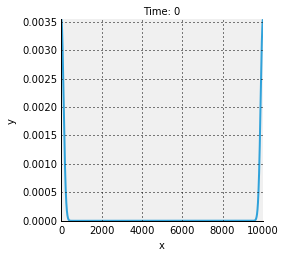
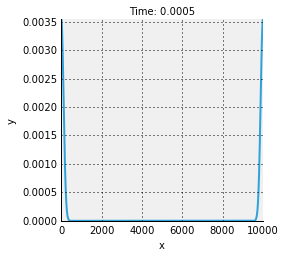
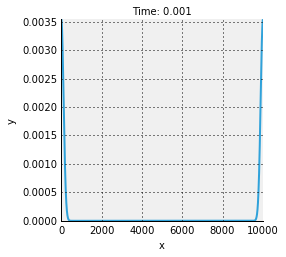
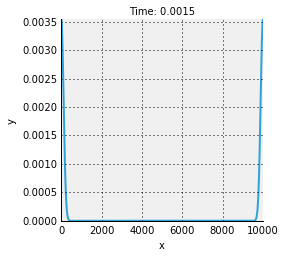
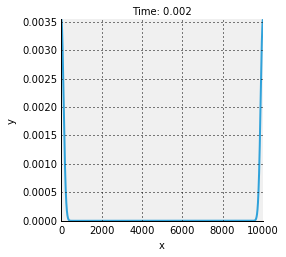
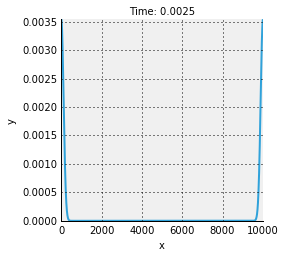
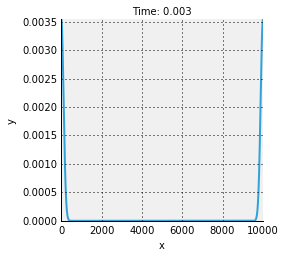
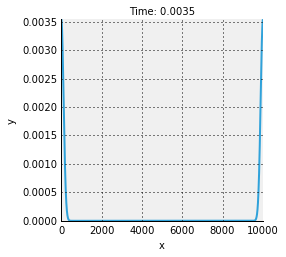
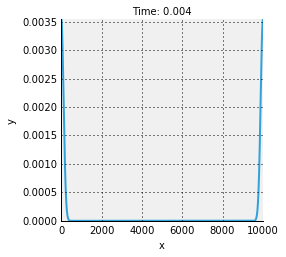
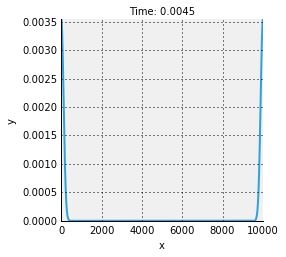
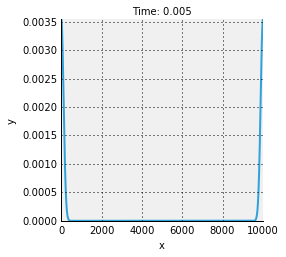
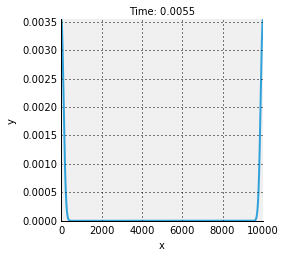
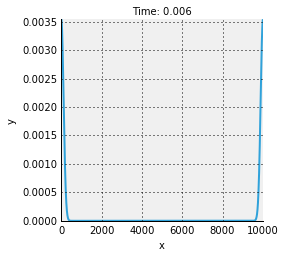
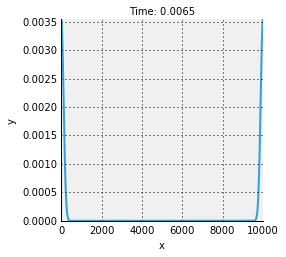
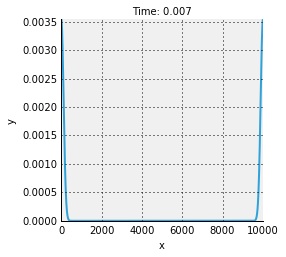
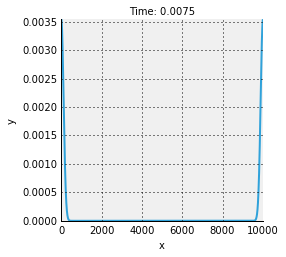
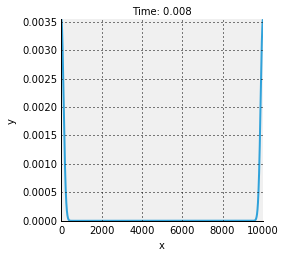
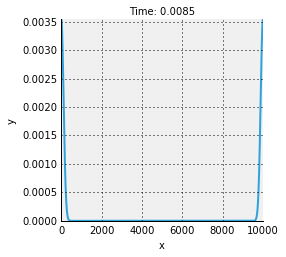
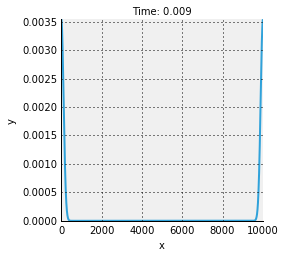
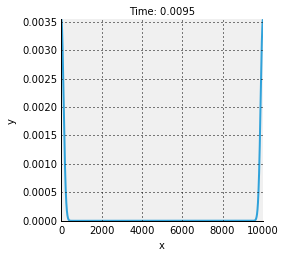
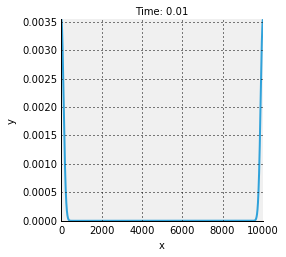
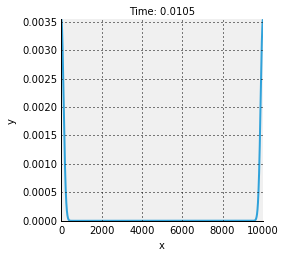
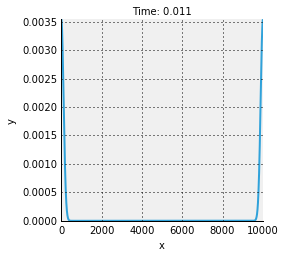
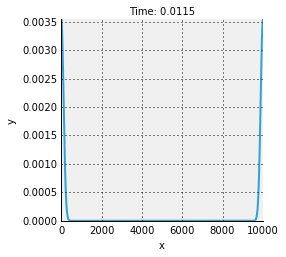
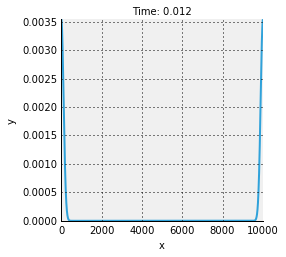
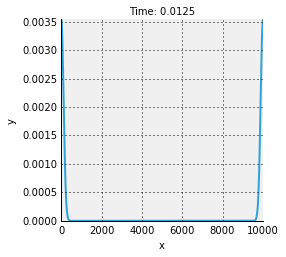
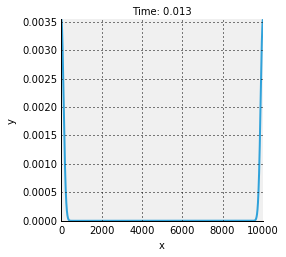
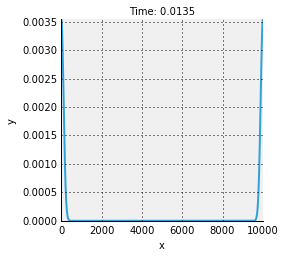
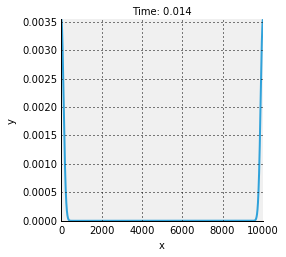
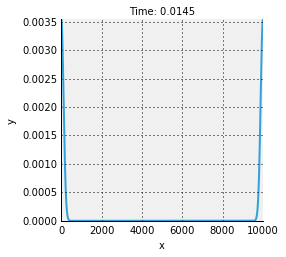
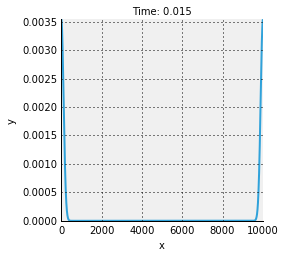
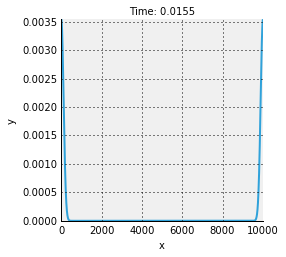
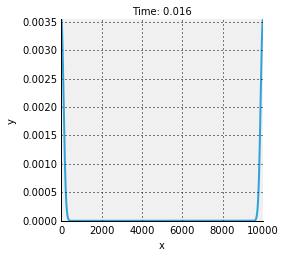
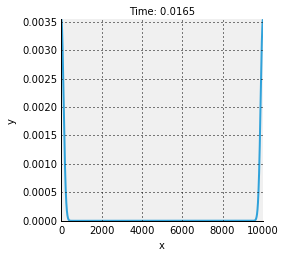
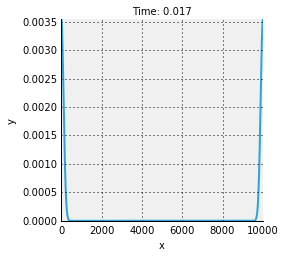
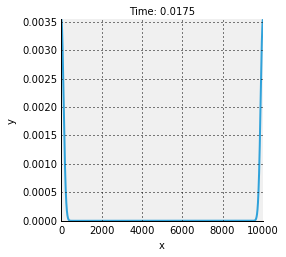
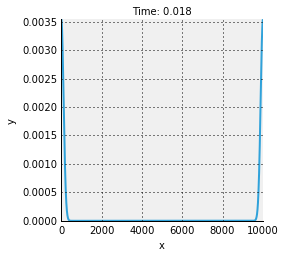
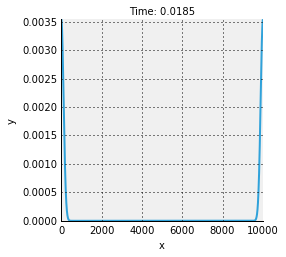
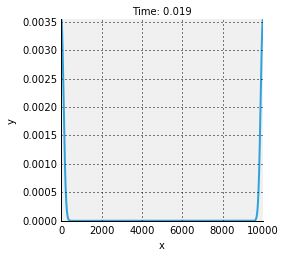
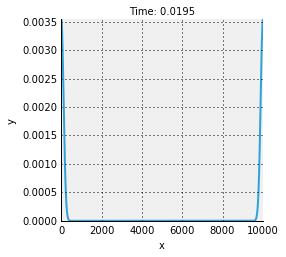
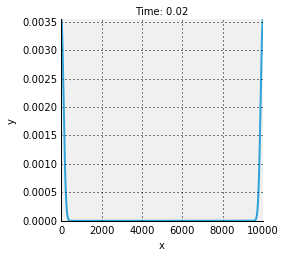
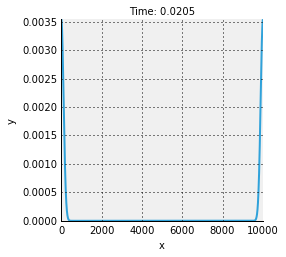
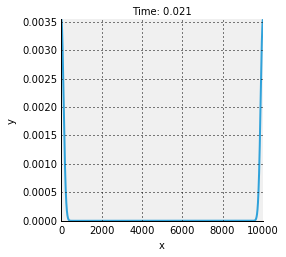
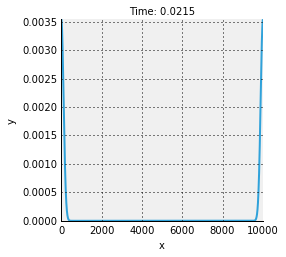
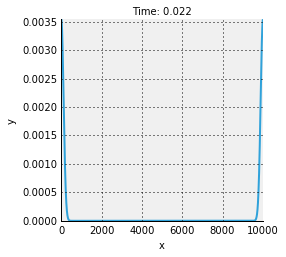
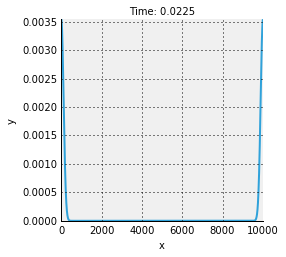
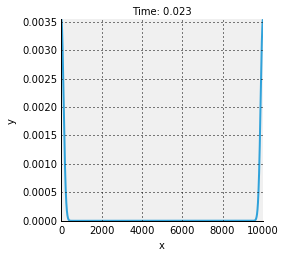
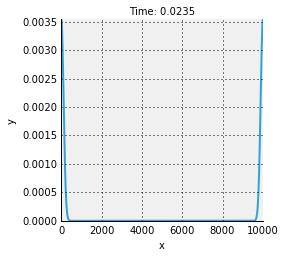
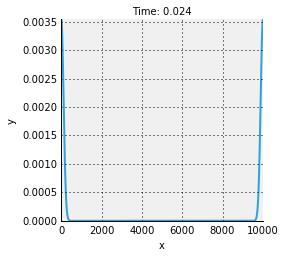
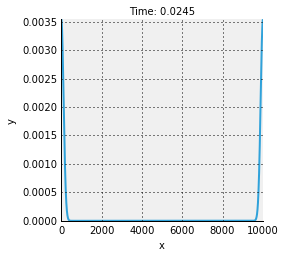
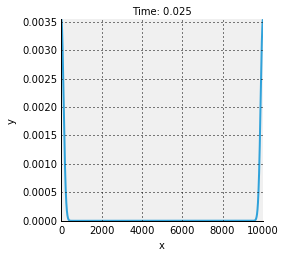
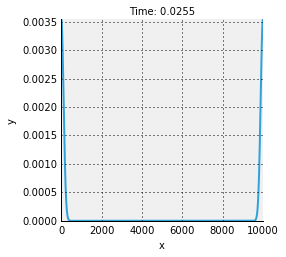
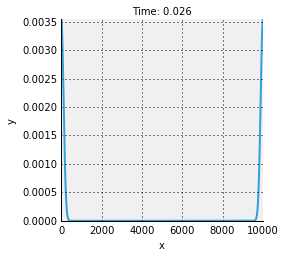
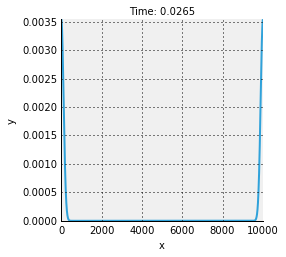
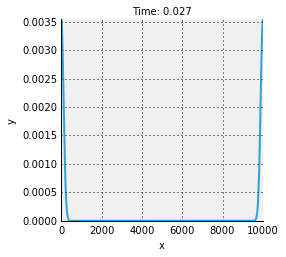
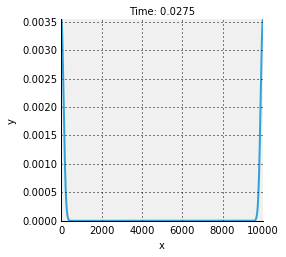
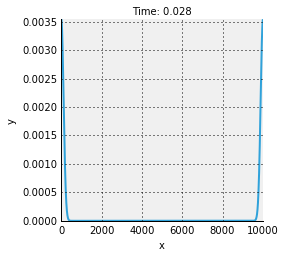
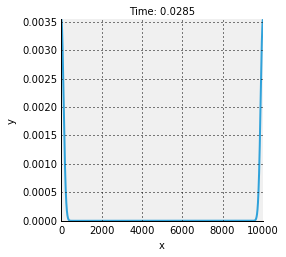
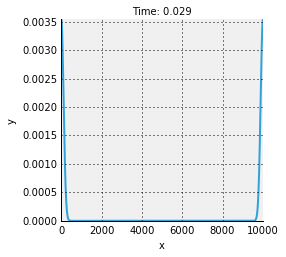
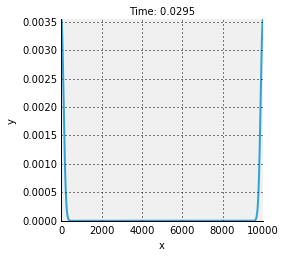
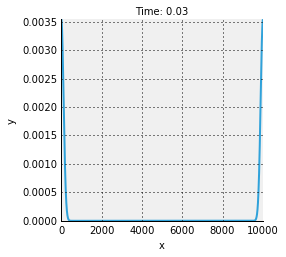
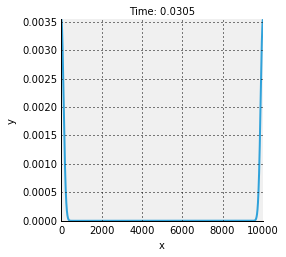
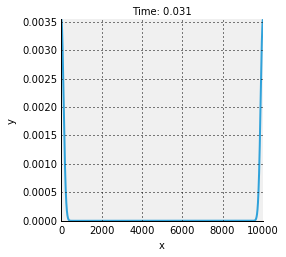
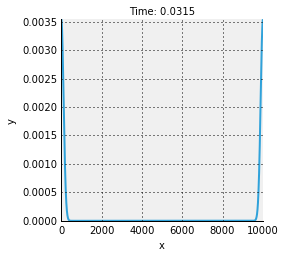
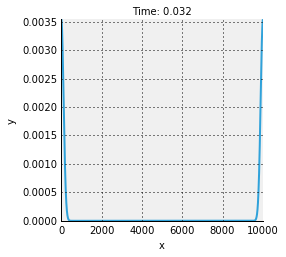
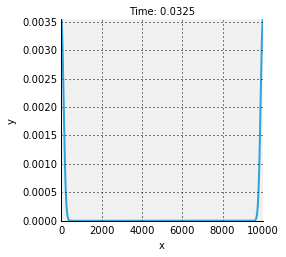
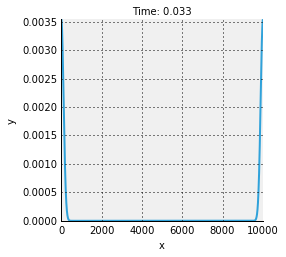
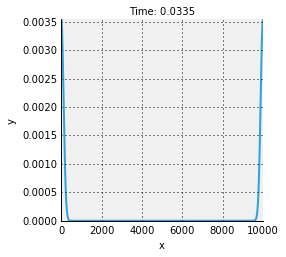
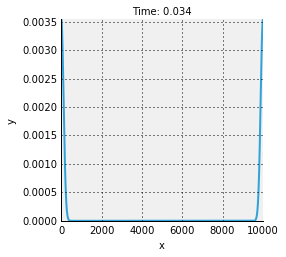
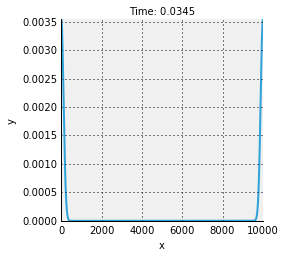
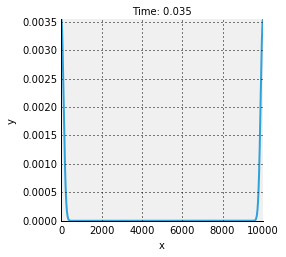
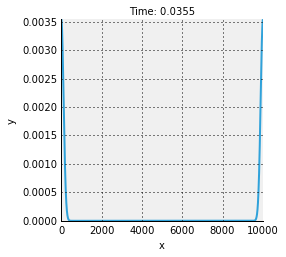
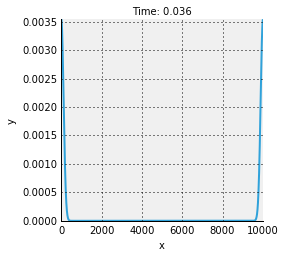
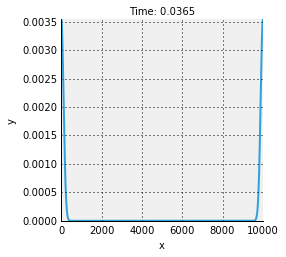
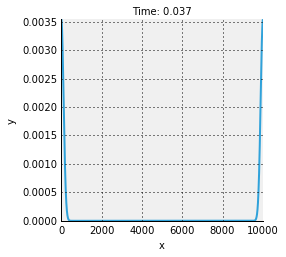
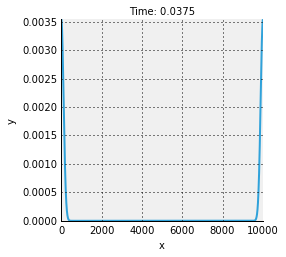
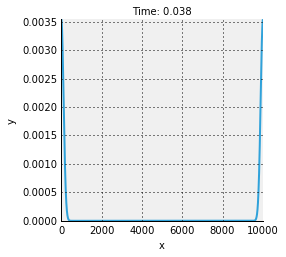
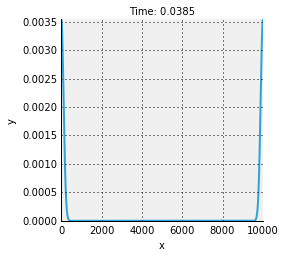
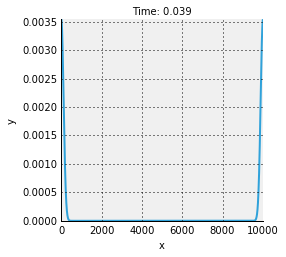
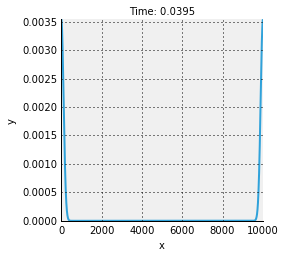
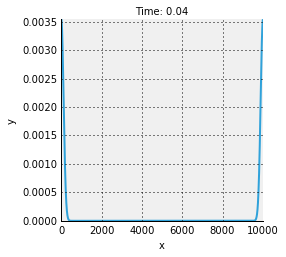
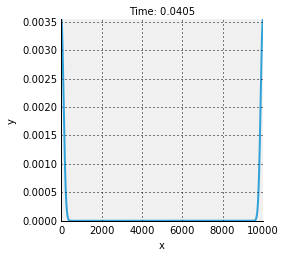
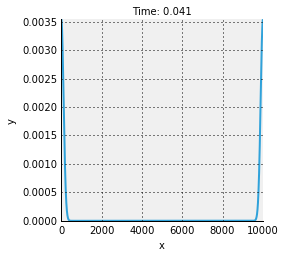
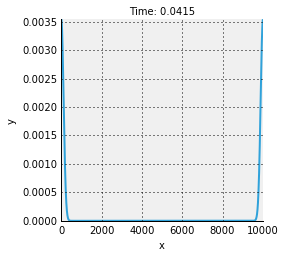
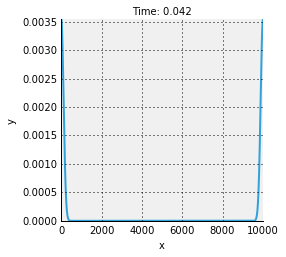
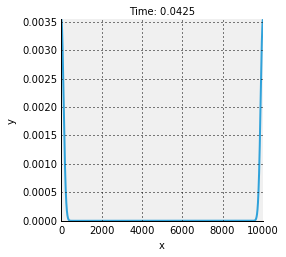
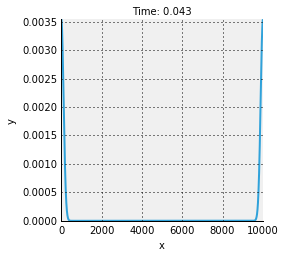
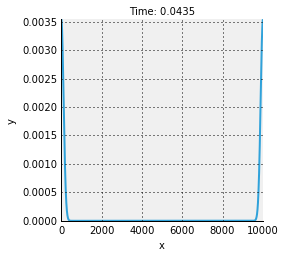
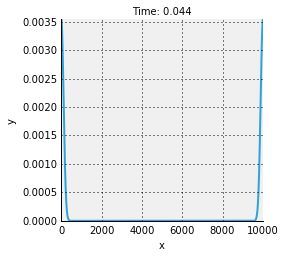
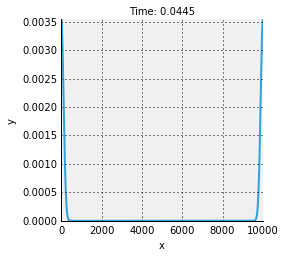
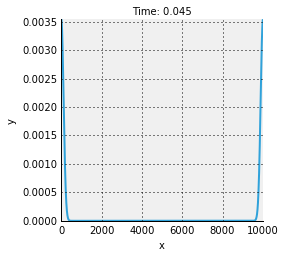
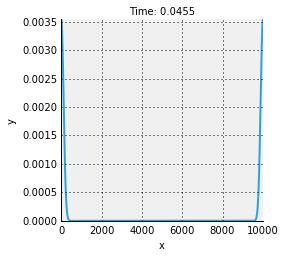
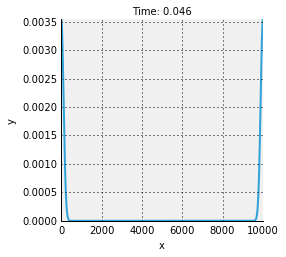
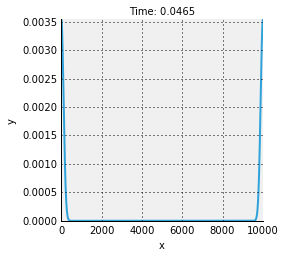
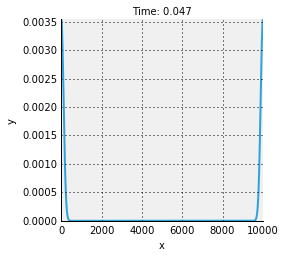
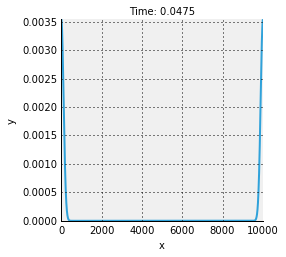
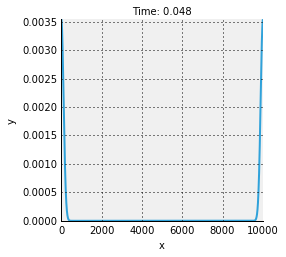
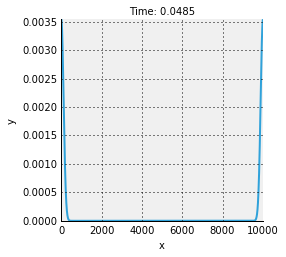
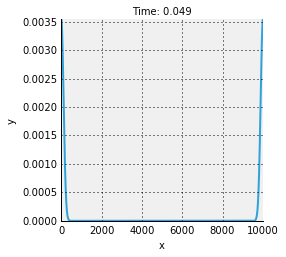
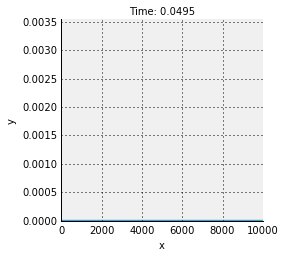

In [367]:
%output holomap='scrubber'
hv.HoloMap([(
            i*dt, hv.Curve(np.abs(psi_r[:, i])**2) )
            for i in range(int(T/dt))], kdims = ["Time"])

b':HoloMap   [Time]\n   :Curve   [x]   (y)'
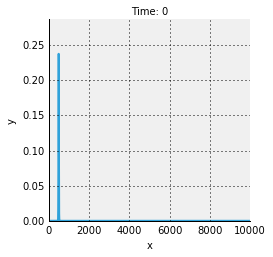
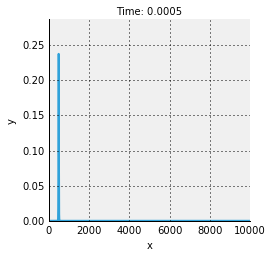
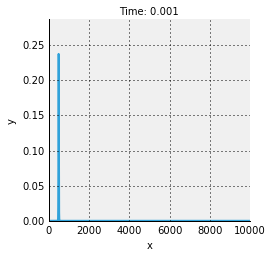
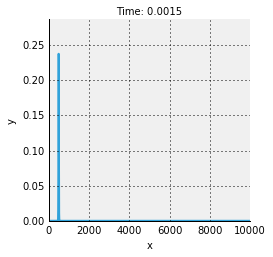
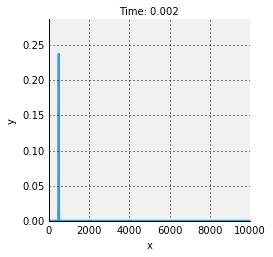
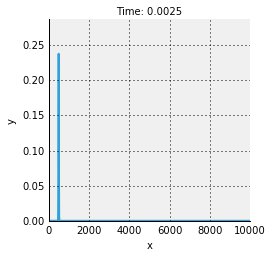
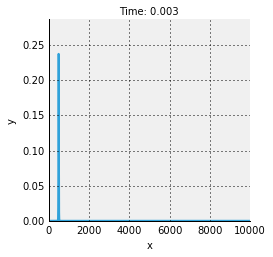
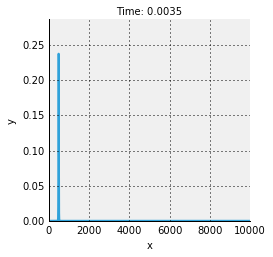
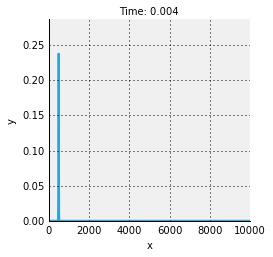
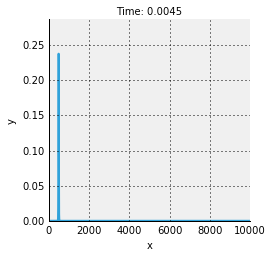
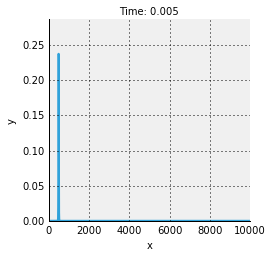
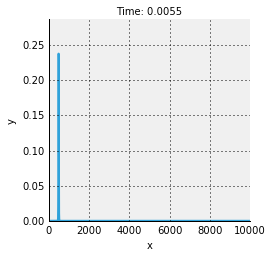
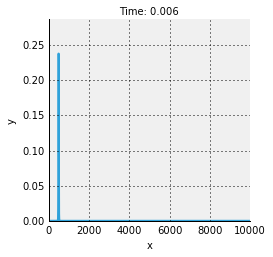
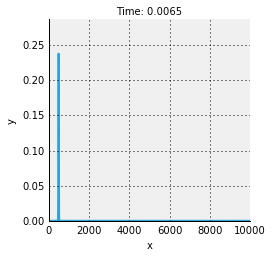
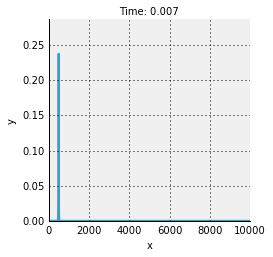
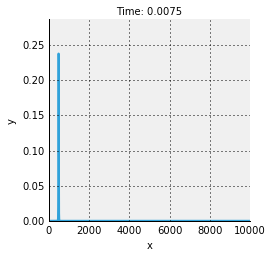
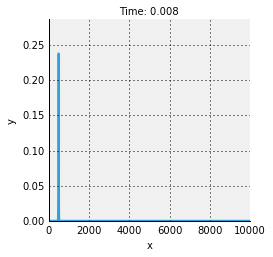
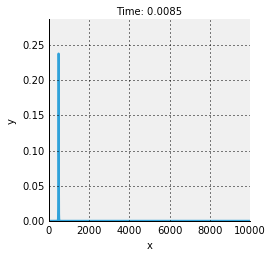
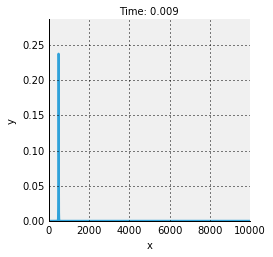
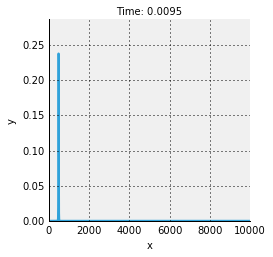
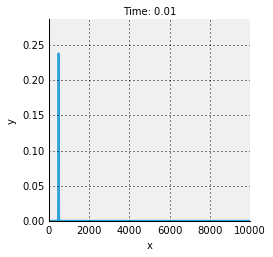
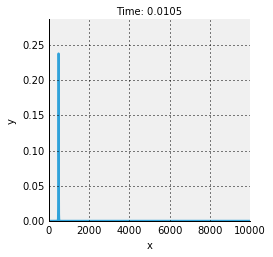
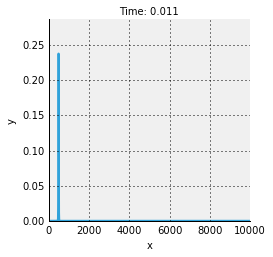
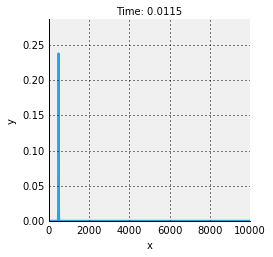
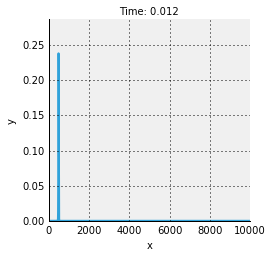
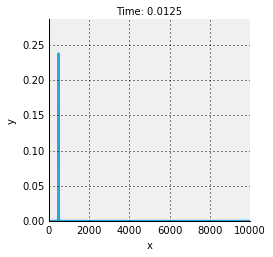
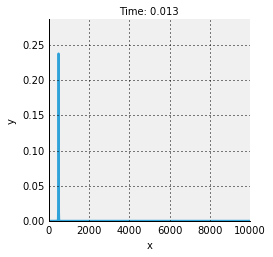
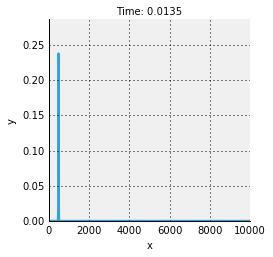
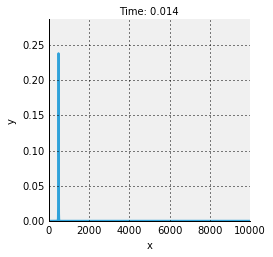
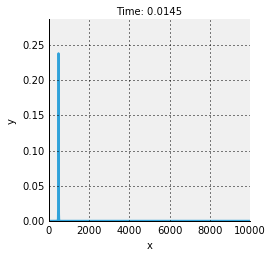
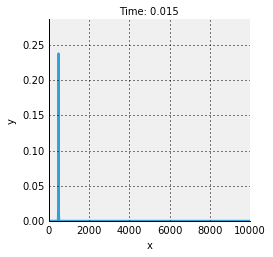
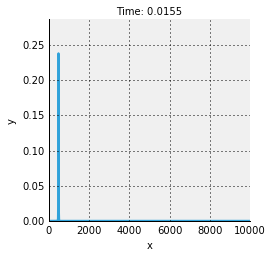
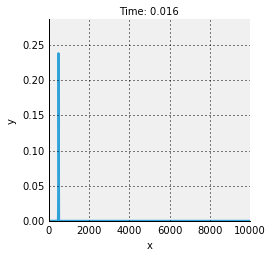
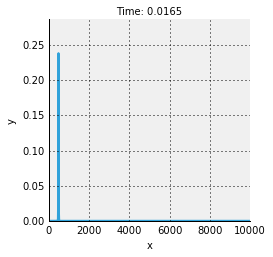
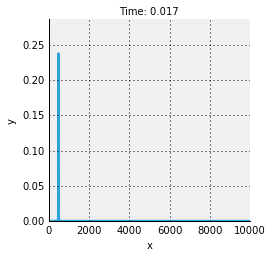
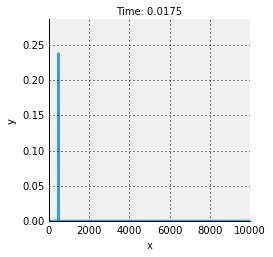
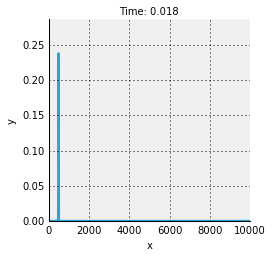
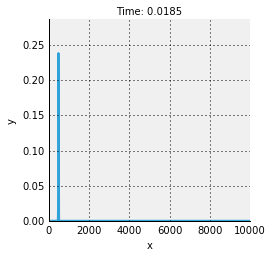
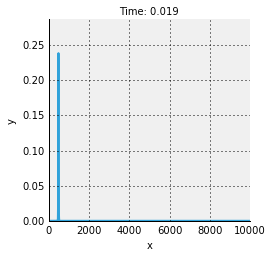
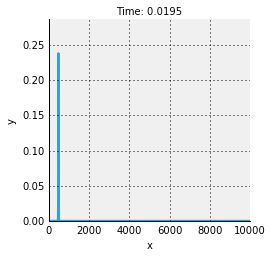
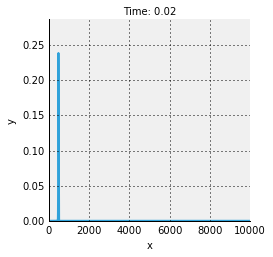
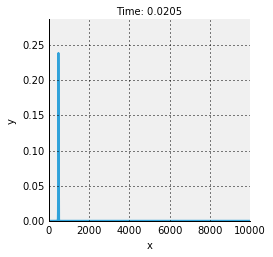
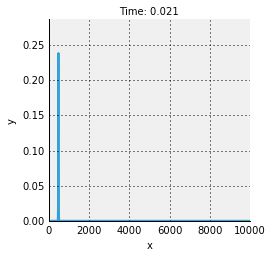
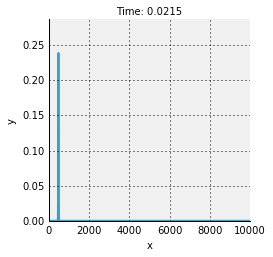
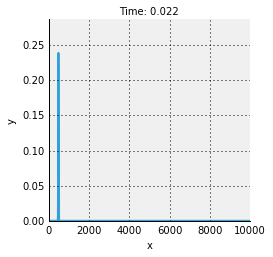
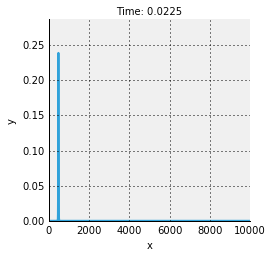
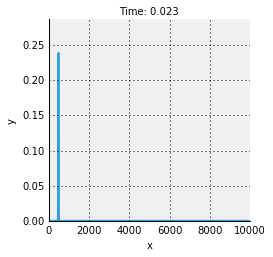
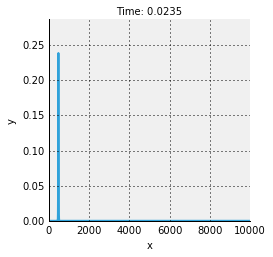
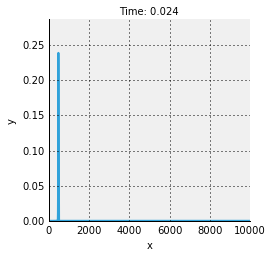
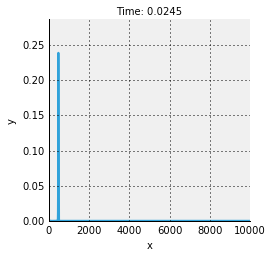
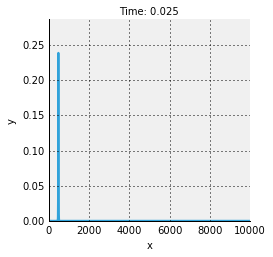
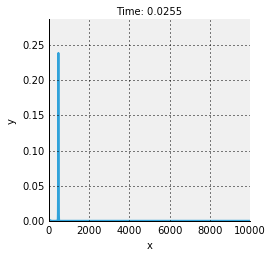
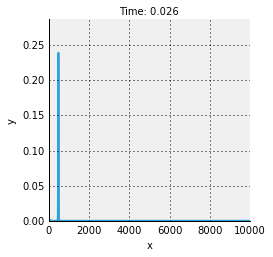
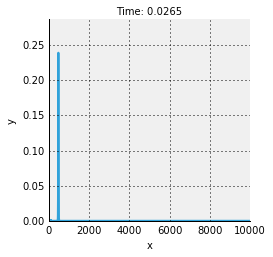
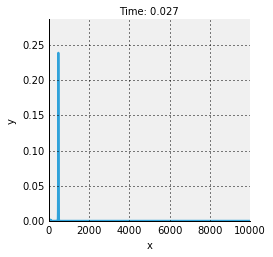
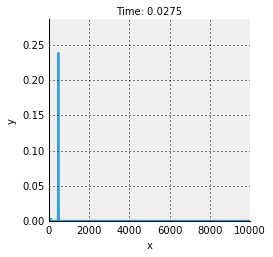
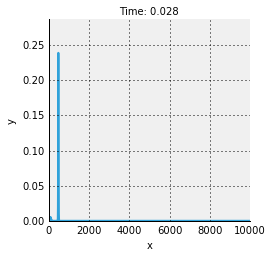
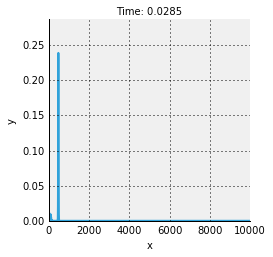
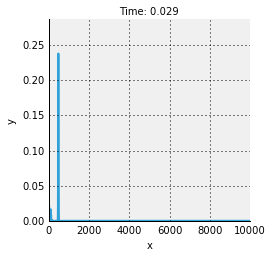
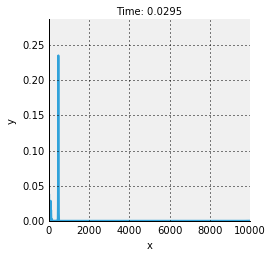
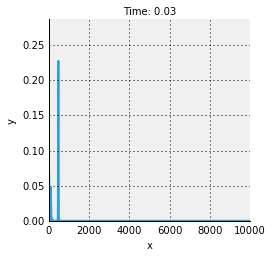
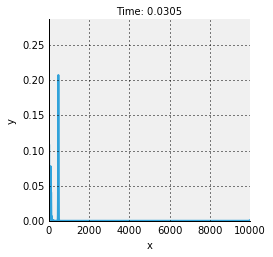
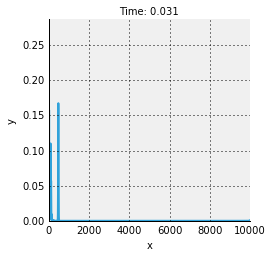
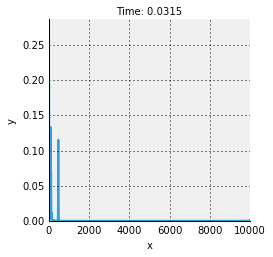
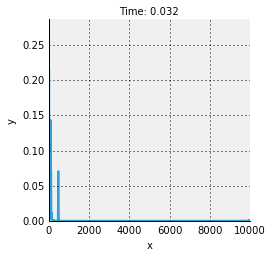
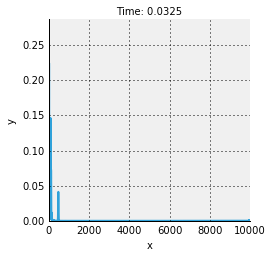
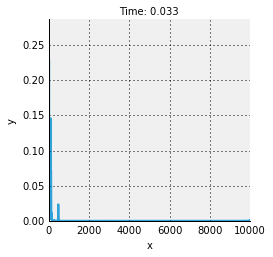
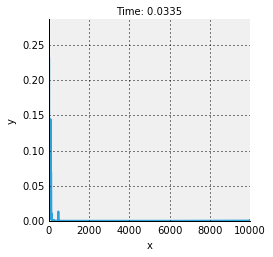
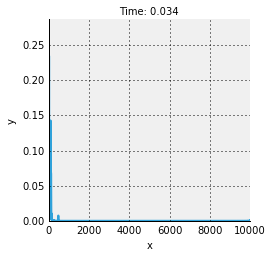
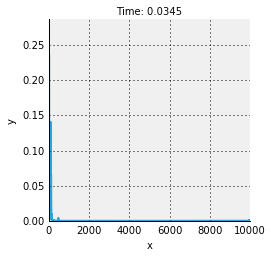
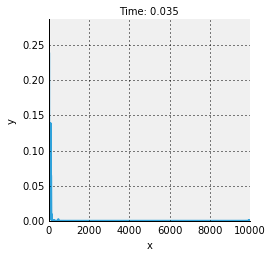
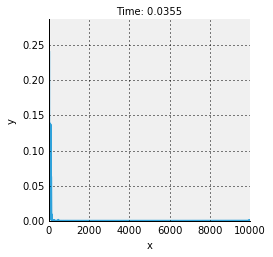
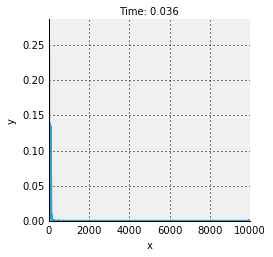
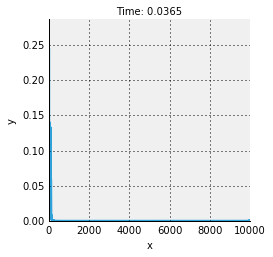
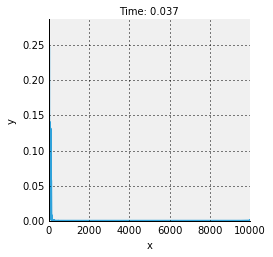
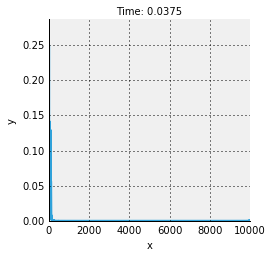
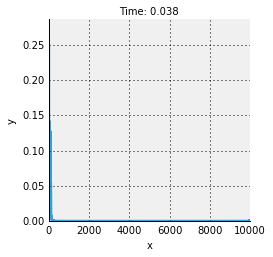
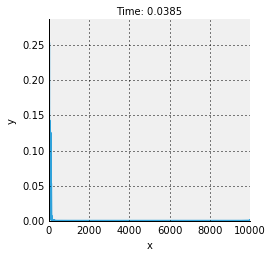
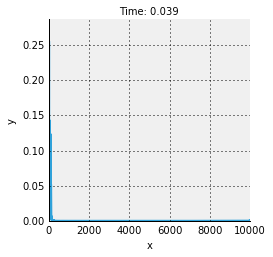
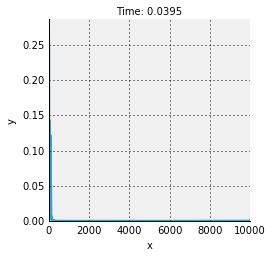
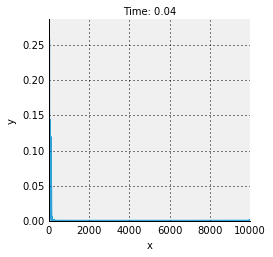
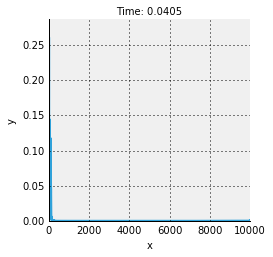
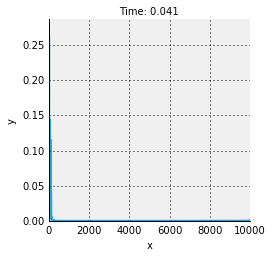
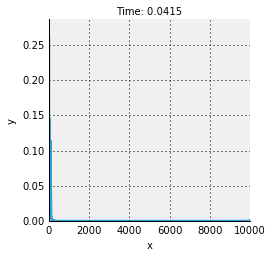
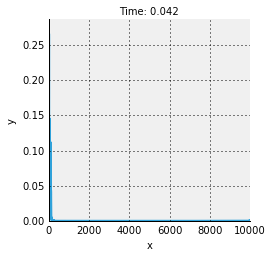
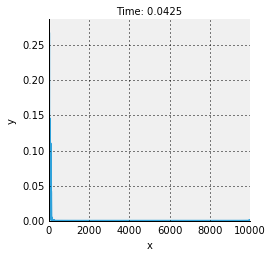
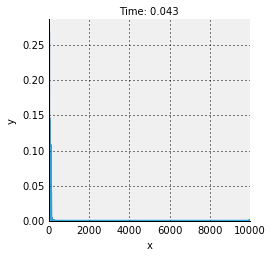
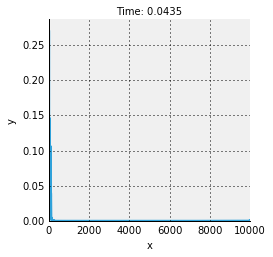
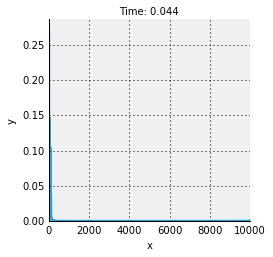
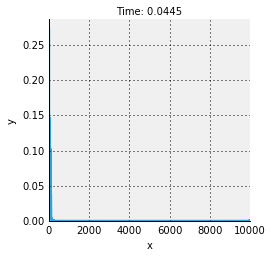
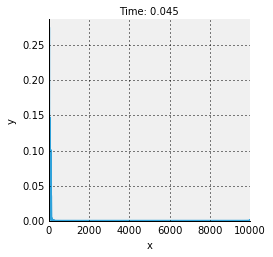
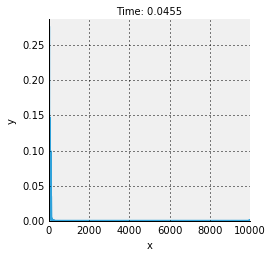
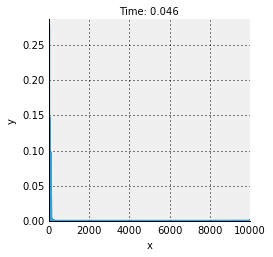
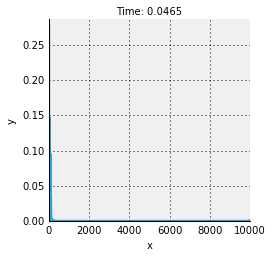
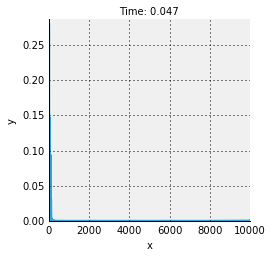
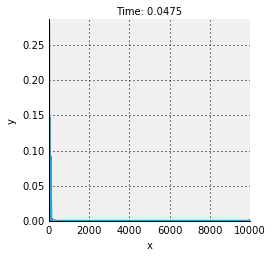
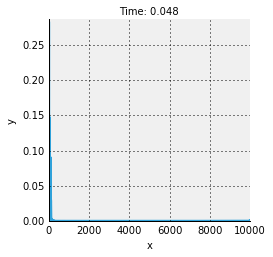
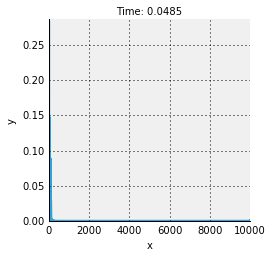
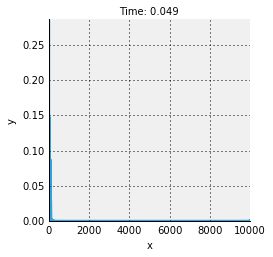
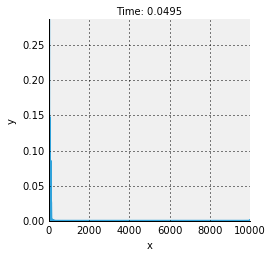

In [353]:
%output holomap='scrubber'
hv.HoloMap([(
            i*dt, hv.Curve(np.abs(psi_m[:, i])) )
            for i in range(int(T/dt))], kdims = ["Time"])